In [15]:
import pandas as pd
import numpy as np
import tensorflow as tf
from QRNN import QRNN

from matplotlib import pyplot as plt
plt.style.use("ggplot")

In [16]:
data  = pd.read_csv('SP500.csv', usecols=['Adjusted Close', 'Date'])
data = data.iloc[::-1]
print(data.shape)
data.head()

(16805, 2)


,Date,Adjusted Close
16804,1950-01-03,16.66
16803,1950-01-04,16.85
16802,1950-01-05,16.93
16801,1950-01-06,16.98
16800,1950-01-09,17.08


In [17]:
model = QRNN(timesteps=15, tau=.05, lr=0.005, neurons=30, iterations=1000)

In [18]:
X_train, y_train, X_test, y_test = model.train_test_split(data[["Adjusted Close"]], n_test=6805)

In [19]:
model.train(X_train, y_train)

0 	Custo de treinamento: 0.540457
1000 	Custo de treinamento: 0.304423


In [20]:
print('\nTreino:')
model.score(X_train, y_train)

print('\nTeste:')
model.score(X_test, y_test)


Treino:
INFO:tensorflow:Restoring parameters from ./tmp/QRNN.ckpt
#Hits:  0.0316
Quantile Loss:  0.0924147605931

Teste:
INFO:tensorflow:Restoring parameters from ./tmp/QRNN.ckpt
#Hits:  0.0602498163115
Quantile Loss:  0.124322185982


In [21]:
var_train = model.predict(X_train)[:, 0, 0]
var_test = model.predict(X_test)[:, 0, 0]
var_train.shape, var_test.shape

INFO:tensorflow:Restoring parameters from ./tmp/QRNN.ckpt
INFO:tensorflow:Restoring parameters from ./tmp/QRNN.ckpt


((10000,), (6805,))

In [22]:
y_train.shape

(10000, 15, 1)

In [23]:
train_data = data[:X_train.shape[0]]
train_data["Return"] = y_train[:, 0, 0] 
train_data["VaR"] = var_train

valid_data = data[X_train.shape[0]:]
valid_data["Return"] = y_test[:, 0, 0] 
valid_data["VaR"] = var_test

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

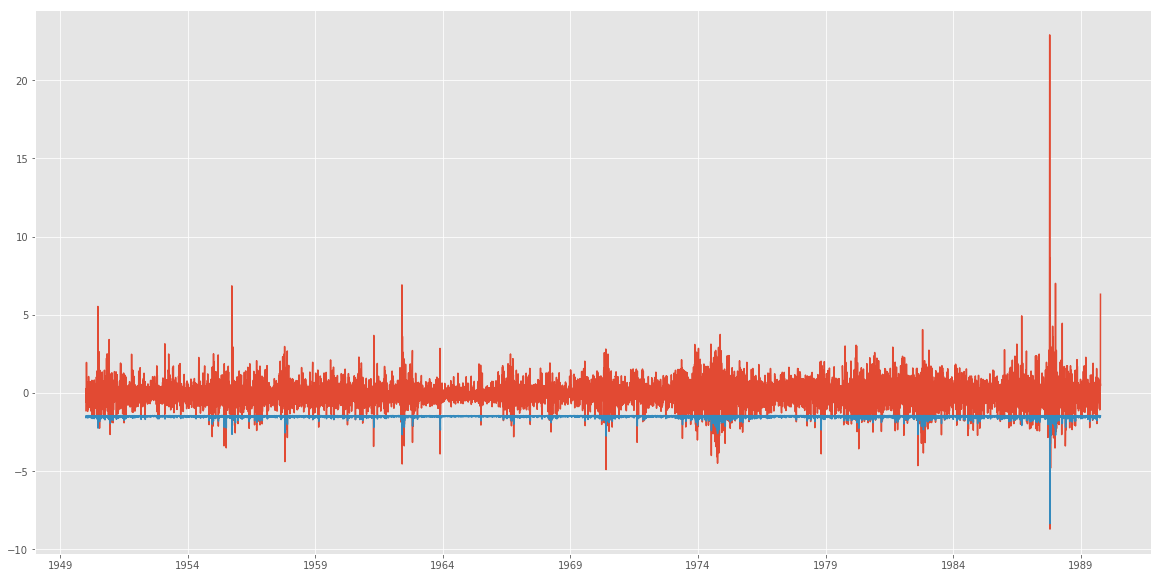

In [24]:
fig = plt.figure(figsize=(20,10))
plt.plot(pd.to_datetime(train_data['Date']), train_data['Return'])
plt.plot(pd.to_datetime(train_data['Date']), train_data['VaR'])
plt.show()

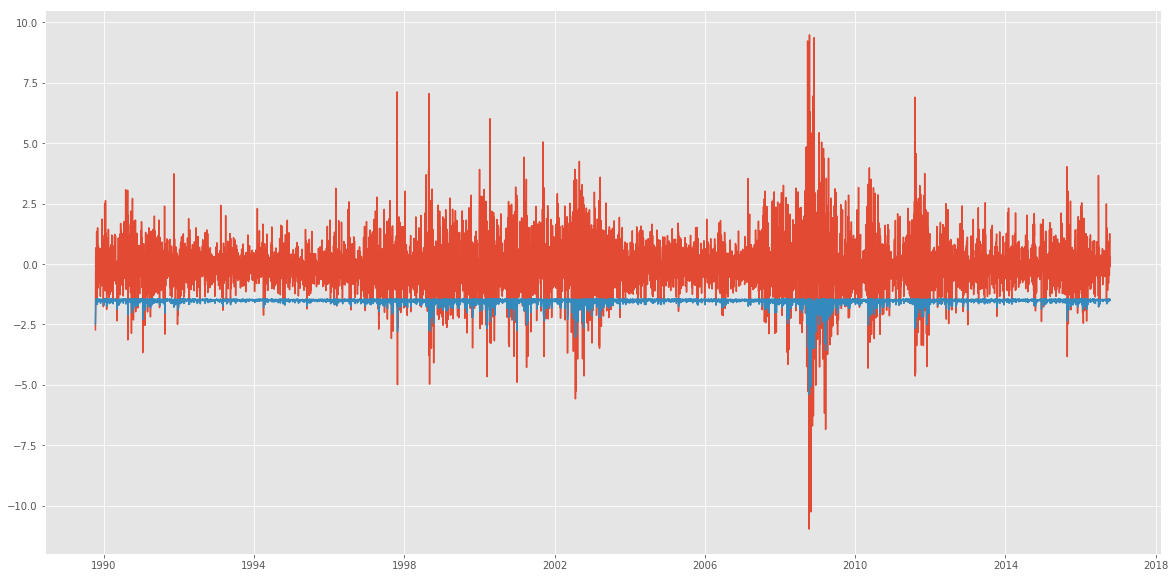

In [25]:
fig = plt.figure(figsize=(20,10))
plt.plot(pd.to_datetime(valid_data['Date']), valid_data['Return'])
plt.plot(pd.to_datetime(valid_data['Date']), valid_data['VaR'])
plt.show()